### MALE FEMALE BIASES CALCULATION


In [1]:
import sys 
sys.path.append('..')

import json
import glob
import traceback
from gensim.models import KeyedVectors
from calculate_distance import CalculateDistance
from calculate_bias import calculate_bias_for_all_embedding
from utils import populate_b2e_dict_for_words, change_label_to_english_at_association
from plot_utils import get_association_subplot, get_bias_plot, get_correlation_heatmap

#CHANGE BELOW TWO LINE WITH
from word_sets_islamic_country_languages_stanford_standards import islamic_country_languages_word_list_for_fasttext as word_list_ln_dict
MODEL_DIR = '../../word_embeddings/islamic_countries_ln_word_vectors/fasttext/'

### load male, female & professional occupation wordlist

In [2]:
def remove_common_words_in_reference_group(group_1, group_2):
    group_1 = list(set(group_1))
    group_2 = list(set(group_2))
    for index_1, word_1 in enumerate(group_1):
        for index_2, word_2 in enumerate(group_2):
            if word_1 == word_2:
                group_1.pop(index_1)
                group_2.pop(index_2)
                break
    return group_1, group_2

def calculate_distance_class_instance(lang):
    
    PROFESSIONAL_OCCUPATIONS = word_list_ln_dict[lang]['pr_occupations']
    PROFESSIONAL_OCCUPATIONS_ENGLISH = word_list_ln_dict['en']['pr_occupations']
    MALE_WORDS = word_list_ln_dict[lang]['male_words']
    FEMALE_WORDS = word_list_ln_dict[lang]['female_words']
    
    PROFESSIONAL_OCCUPATIONS = [word.strip() for word in PROFESSIONAL_OCCUPATIONS]
    MALE_WORDS = [word.strip() for word in MALE_WORDS]
    FEMALE_WORDS = [word.strip() for word in FEMALE_WORDS]
    
    MALE_WORDS, FEMALE_WORDS = remove_common_words_in_reference_group(MALE_WORDS, FEMALE_WORDS)
    
    target_groups = [PROFESSIONAL_OCCUPATIONS]
    target_group_labels = ['professional_occupation']

    reference_groups = [MALE_WORDS, FEMALE_WORDS]
    reference_group_labels = ['male', 'female']
    
    
    print('target group -->')
    for group, labels in zip(target_groups, target_group_labels):
        print(labels, group)
        print('\n')
    
    print('\n')

    print('reference group -->')
    for group, labels in zip(reference_groups, reference_group_labels):
        print(labels, group)
        print('\n')
    
    
    
    calculate_association_distance = CalculateDistance()
    calculate_association_distance.set_target_word_groups(target_word_groups=target_groups, target_group_labels=target_group_labels)
    calculate_association_distance.set_reference_word_groups(reference_word_groups=reference_groups, reference_group_labels=reference_group_labels)
    
    b2e_dict = populate_b2e_dict_for_words(PROFESSIONAL_OCCUPATIONS, PROFESSIONAL_OCCUPATIONS_ENGLISH)
    
    return calculate_association_distance, b2e_dict

### Calculate associations


target group -->
professional_occupation ['দারোয়ান', 'পরিসংখ্যানবিদ', 'মিডওয়াইফ', 'বেলিফ', 'নিলাম', 'ফটোগ্রাফার', 'ভূতত্ত্ববিদ', 'জুতো প্রস্তুতকারক', 'অ্যাথলেট', 'ক্যাশিয়ার', 'নর্তকী', 'গৃহকর্মী', 'হিসাবরক্ষক', 'পদার্থবিদ', 'উদ্যানবিদ', 'দাঁতের', 'তাঁতি', 'কামার', 'মনোবিজ্ঞানী', 'তত্ত্বাবধায়ক', 'গণিতবিদ', 'সমীক্ষক', 'দর্জি', 'ডিজাইনার', 'অর্থনীতিবিদ', 'যান্ত্রিক', 'শ্রমিক', 'পোস্টমাস্টার', 'ব্রোকার', 'রসায়নবিদ', 'গ্রন্থাগারিক', 'পরিচারক', 'কেরানি', 'সুরকার', 'কুলি', 'বিজ্ঞানী', 'ছুতার', 'নাবিক', 'প্রশিক্ষক', 'শেরিফ', 'পাইলট', 'পরিদর্শক', 'রাজমিস্ত্রি', 'বেকার', 'প্রশাসক', 'স্থপতি', 'সংগ্রাহক', 'অপারেটর', 'সার্জন', 'চালক', 'চিত্রশিল্পী', 'কন্ডাক্টর', 'নার্স', 'কুক', 'ইঞ্জিনিয়ার', 'অবসরপ্রাপ্ত', 'বিক্রয়', 'আইনজীবী', 'পাদ্রী', 'চিকিত্সক', 'কৃষক', 'কেরানি', 'পরিচালক', 'রক্ষী', 'শিল্পী', 'স্মিথ', 'অফিসিয়াল', 'পুলিশ', 'ডাক্তার', 'অধ্যাপক', 'ছাত্র', 'বিচারক', 'শিক্ষক', 'লেখক', 'সচিব', 'সৈনিক']




reference group -->
male ['ছেলে', 'ভাতিজা', 'চাচা', 'তাঁকে', 'পুরুষ', 'ভাই', 'পিতৃ', 'পু

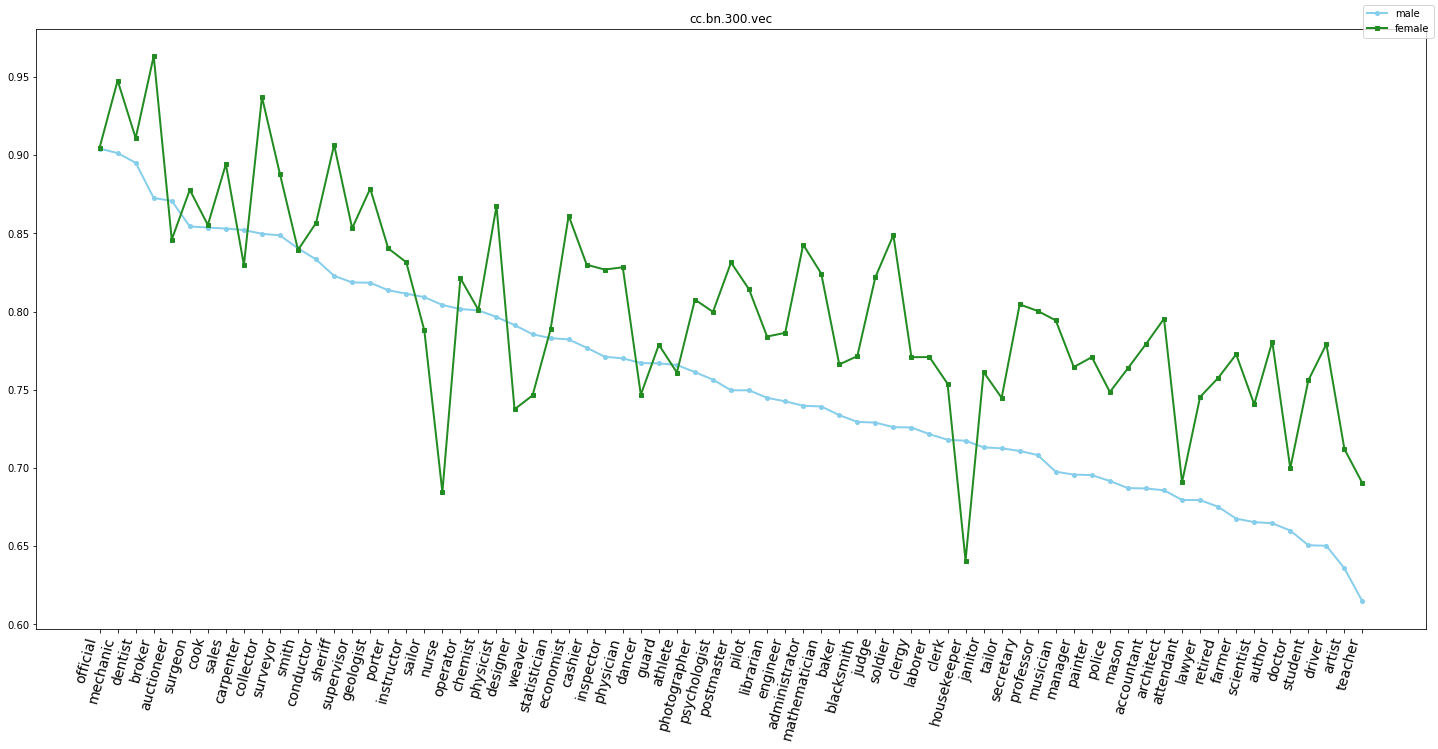

total 4 missing words for this embedding {'মিডওয়াইফ', 'বেলিফ', 'উদ্যানবিদ', 'জুতো প্রস্তুতকারক'}



target group -->
professional_occupation ['جینیٹر', 'شماریات دان', 'دایہ', 'بیلف', 'نیلامی', 'فوٹوگرافر', 'ماہر ارضیات', 'جوتا بنانے والا', 'ایتھلیٹ', 'کیشئیر', 'ڈانسر', 'گھریلو ملازم', 'اکاؤنٹنٹ', 'طبیعیات دان', 'مالی', 'دانتوں کا ڈاکٹر', 'ویور', 'لوہار', 'ماہر نفسیات', 'سپروائزر', 'ریاضی دان', 'سرویئر', 'درزی', 'ڈیزائنر', 'ماہر معاشیات', 'مکینک', 'مزدور', 'پوسٹ ماسٹر', 'بروکر', 'کیمسٹ', 'لائبریرین', 'حاضر خدمت', 'مولوی', 'موسیقار', 'پورٹر', 'سائنسدان', 'بڑھئی', 'نااخت', 'انسٹرکٹر', 'شیرف', 'پائلٹ', 'انسپکٹر', 'میسن', 'بیکر', 'ایڈمنسٹریٹر', 'معمار', 'کلکٹر', 'آپریٹر', 'سرجن', 'ڈرائیور', 'پینٹر', 'کنڈیکٹر', 'نرس', 'کک', 'انجینئر', 'ریٹائرڈ', 'سیلز', 'وکیل', 'پادری', 'فزیشن', 'کسان', 'کلرک', 'منیجر', 'گارڈ', 'آرٹسٹ', 'سمتھ', 'آفیشل', 'پولیس', 'ڈاکٹر', 'پروفیسر', 'طالب علم', 'جج', 'اساتذہ', 'مصنف', 'سکریٹری', 'سپاہی']




reference group -->
male ['بھائی', 'بھتیجے', 'آدمی', 'ماموں', 'مرد'

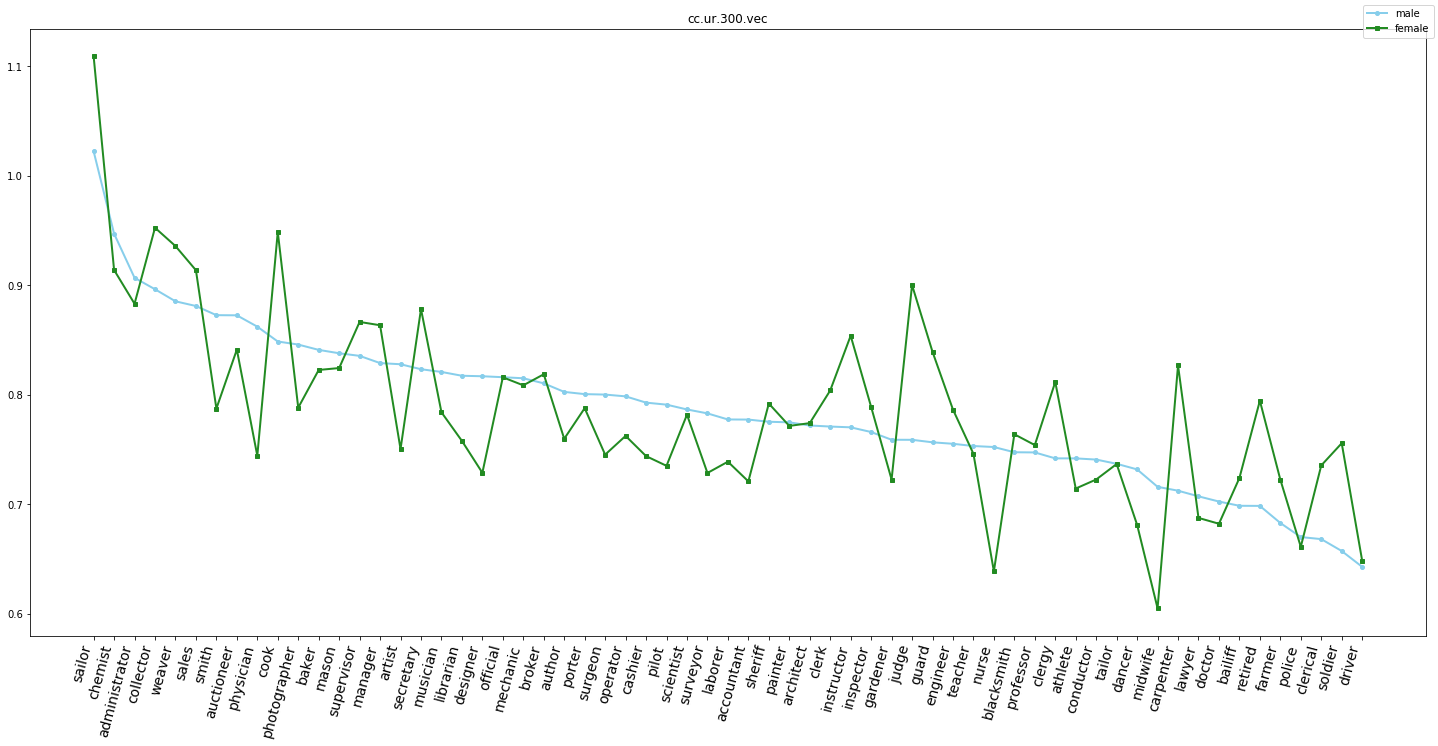

total 13 missing words for this embedding {'طالب علم', 'شماریات دان', 'پوسٹ ماسٹر', 'جینیٹر', 'ماہر ارضیات', 'جوتا بنانے والا', 'گھریلو ملازم', 'ماہر معاشیات', 'طبیعیات دان', 'حاضر خدمت', 'ریاضی دان', 'دانتوں کا ڈاکٹر', 'ماہر نفسیات'}



target group -->
professional_occupation ['بواب', 'إحصائي', 'قابلة', 'مأمور', 'بائع مزاد', 'مصور', 'جيولوجي', 'صانع أحذية', 'رياضي', 'أمين صندوق', 'راقصة', 'مدبرة منزل', 'محاسب', 'فيزيائي', 'بستاني', 'طبيب أسنان', 'ويفر', 'حداد', 'طبيب نفساني', 'مشرف', 'عالم رياضيات', 'مساح', 'خياط', 'مصمم', 'اقتصادي', 'ميكانيكي', 'عامل', 'مدير مكتب بريد', 'وسيط', 'كيميائي', 'أمين مكتبة', 'خادم', 'رجال دين', 'موسيقي', 'بورتر', 'عالم', 'نجار', 'بحار', 'مدرب', 'شريف', 'طيار', 'مفتش', 'ميسون', 'خباز', 'مسؤول', 'مهندس معماري', 'جامع', 'عامل', 'جراح', 'سائق', 'رسام', 'موصل', 'ممرضة', 'كوك', 'مهندس', 'متقاعد', 'مبيعات', 'محام', 'رجال دين', 'طبيب', 'مزارع', 'كاتب', 'مدير', 'حارس', 'فنان', 'سميث', 'مسؤول', 'شرطة', 'طبيب', 'أستاذ', 'طالب', 'قاضي', 'معلم', 'كاتب', 'سكرتير', 'جند

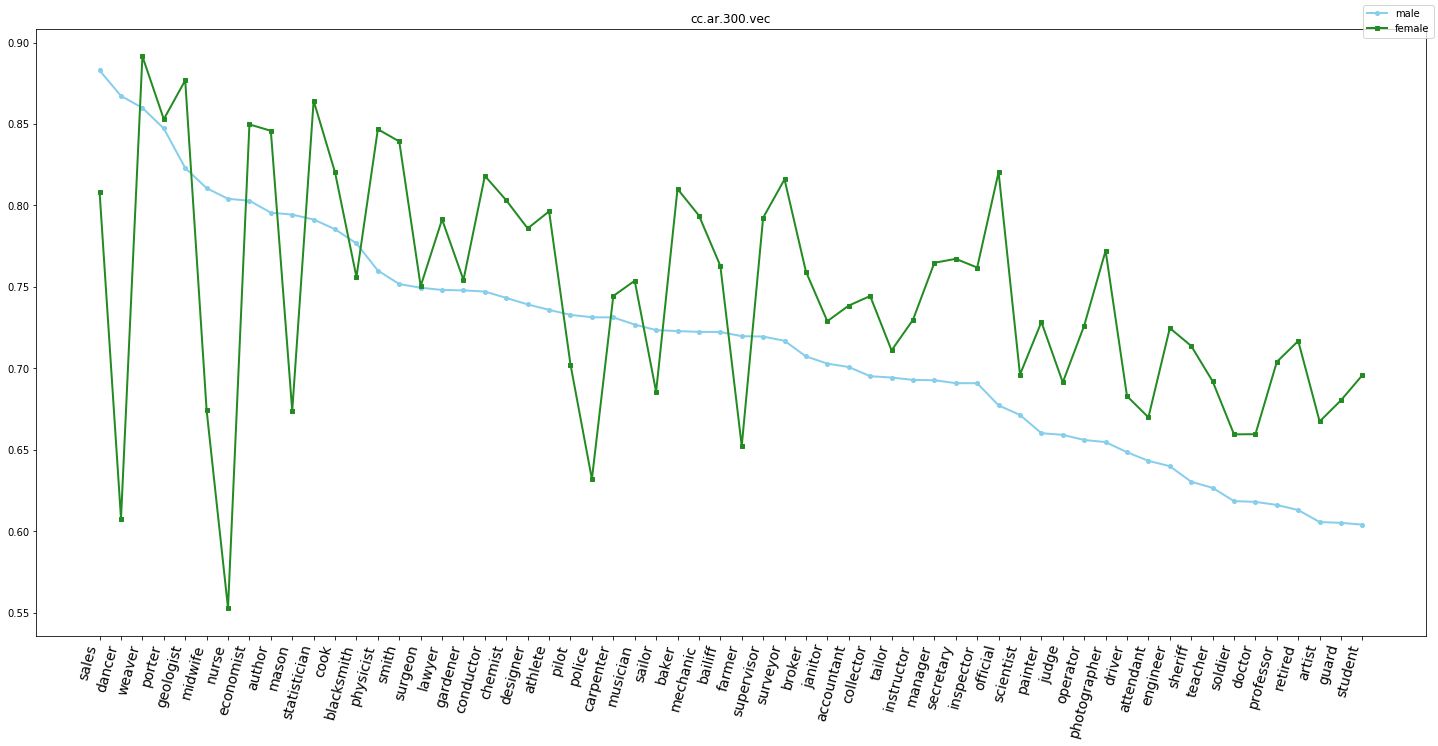

total 13 missing words for this embedding {'مهندس معماري', 'ابن أخي', 'بائع مزاد', 'مدبرة منزل', 'عالم رياضيات', 'أبناء أخي', 'أمين صندوق', 'أمين مكتبة', 'رجال دين', 'طبيب نفساني', 'صانع أحذية', 'طبيب أسنان', 'مدير مكتب بريد'}



target group -->
professional_occupation ['janitor', 'statistician', 'bidan', 'bailif', 'lelongan', 'jurugambar', 'ahli geologi', 'kasut', 'atletpenari', 'rumah tangga', 'akauntan', 'ahli fizik', 'tukang kebun', 'doktor gigi', 'tukang tenun', 'tukang besi', 'psikologiahli matematik', 'juruukur', 'tukang jahit', 'pereka', 'pakar ekonomi', 'mekanik', 'buruh', 'tukang pos', 'broker', 'ahli kimia', 'pustakawan', 'atendan', 'ahli muzik', 'tukang porter', 'saintis', 'tukang kayu', 'pelaut', 'pengajar', 'sheriff', 'pilot', 'inspector baker', 'pentadbir', 'arkitek', 'pengumpul', 'operator', 'pakar bedah', 'pemandu', 'pelukis', 'konduktor', 'jururawat', 'tukang masakpensiun', 'jualan', 'peguam', 'ketua', 'doktor', 'petani', 'kerani', 'pengurus', 'pengawal', 'artis', 's

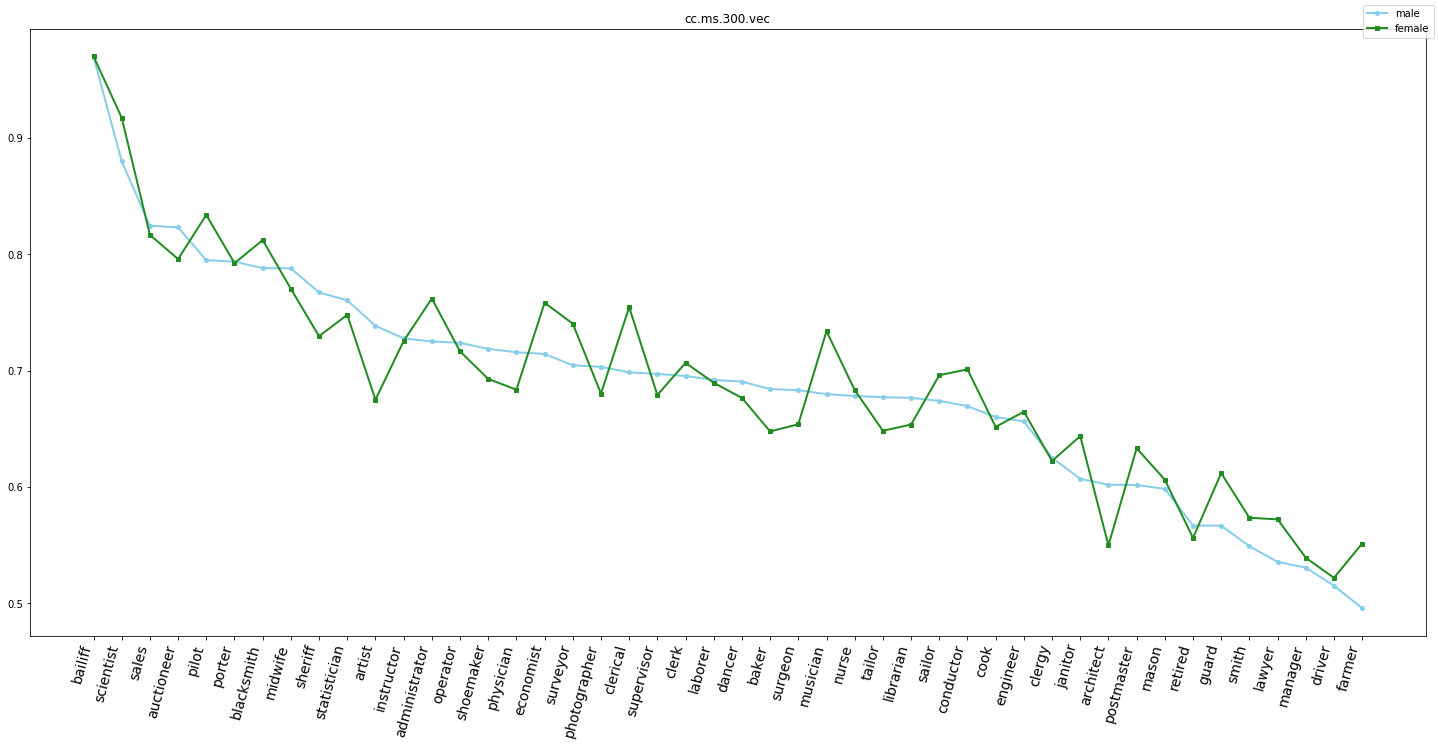

total 26 missing words for this embedding {'pakar bedah', 'tukang tenun', 'pakar ekonomi', 'bapa saudara', 'nieces', 'tukang pos', 'tukang jahit', 'ahli muzik', 'tukang kayu', 'saudara lelaki', 'inspector baker', 'psikologiahli matematik', 'saudara perempuan', 'rumah tangga', 'atletpenari', 'femen', 'tukang porter', 'anak perempuan', 'ibu saudara', 'doktor gigi', 'tukang besi', 'tukang kebun', 'tukang masakpensiun', 'ahli geologi', 'ahli kimia', 'ahli fizik'}





In [3]:
association_dict = {}
model_dir = MODEL_DIR
filenames = glob.glob(model_dir + '*')
# print(filenames)
for filename in filenames:
    embedding_name = filename.split('/')[-1]
    lang_name = embedding_name.split('.')[1]
    if lang_name == 'id':
        continue
    calculate_association_distance, b2e_dict = calculate_distance_class_instance(lang_name)
    target_wise_association_for_this_paper = {}
    if embedding_name.split('.')[-1] == 'bin':
        model = KeyedVectors.load_word2vec_format(filename, binary=True)
    else:
        model = KeyedVectors.load_word2vec_format(filename, binary=False)
    target_wise_association_for_this_embedding, missing_words = calculate_association_distance.get_association_for_provided_embedding(model=model)
    
    
    
    target_wise_association_for_this_embedding = change_label_to_english_at_association(target_wise_association_for_this_embedding, b2e_dict)
    association_dict[embedding_name] = target_wise_association_for_this_embedding
    
    
    get_association_subplot(target_wise_association_for_this_paper=target_wise_association_for_this_embedding, b2e_dict = b2e_dict, title= embedding_name)
    
    print('total {} missing words for this embedding {}'.format(len(missing_words), missing_words))
    print('\n' * 2)



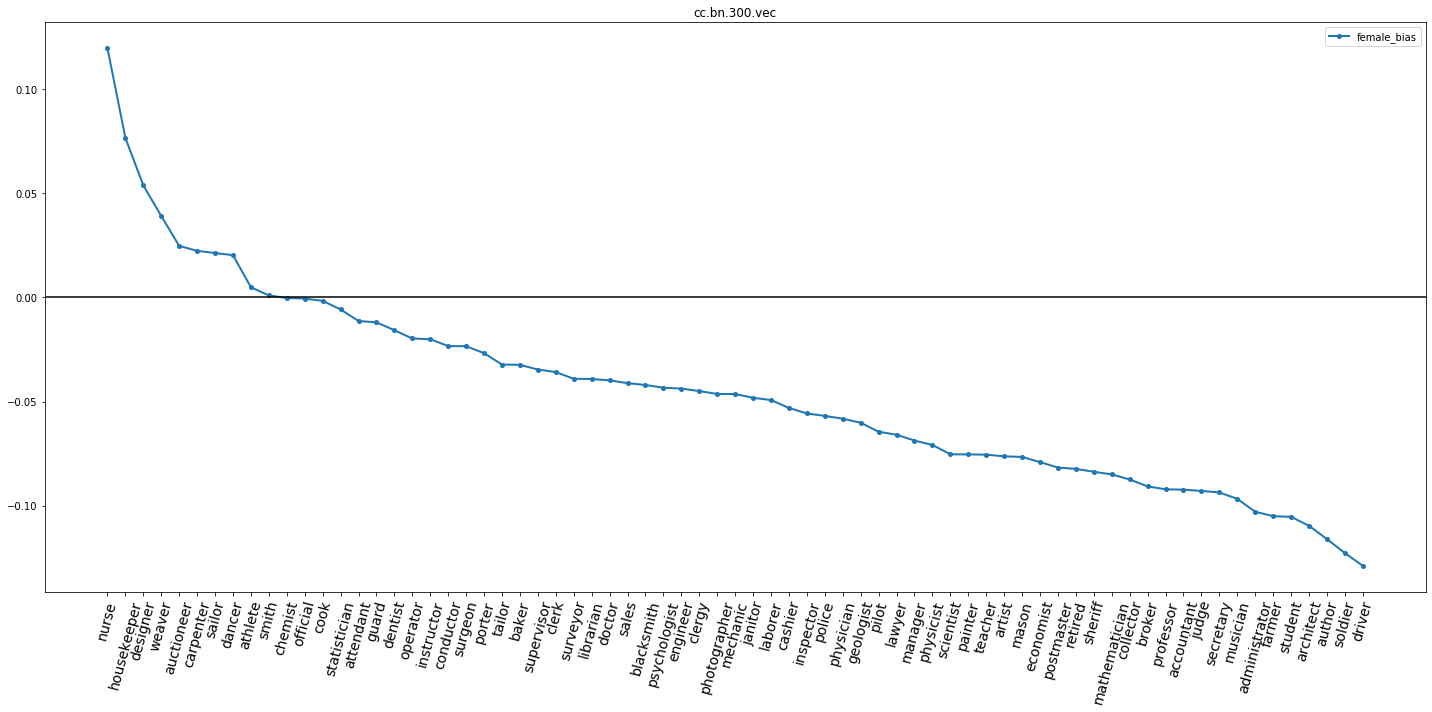

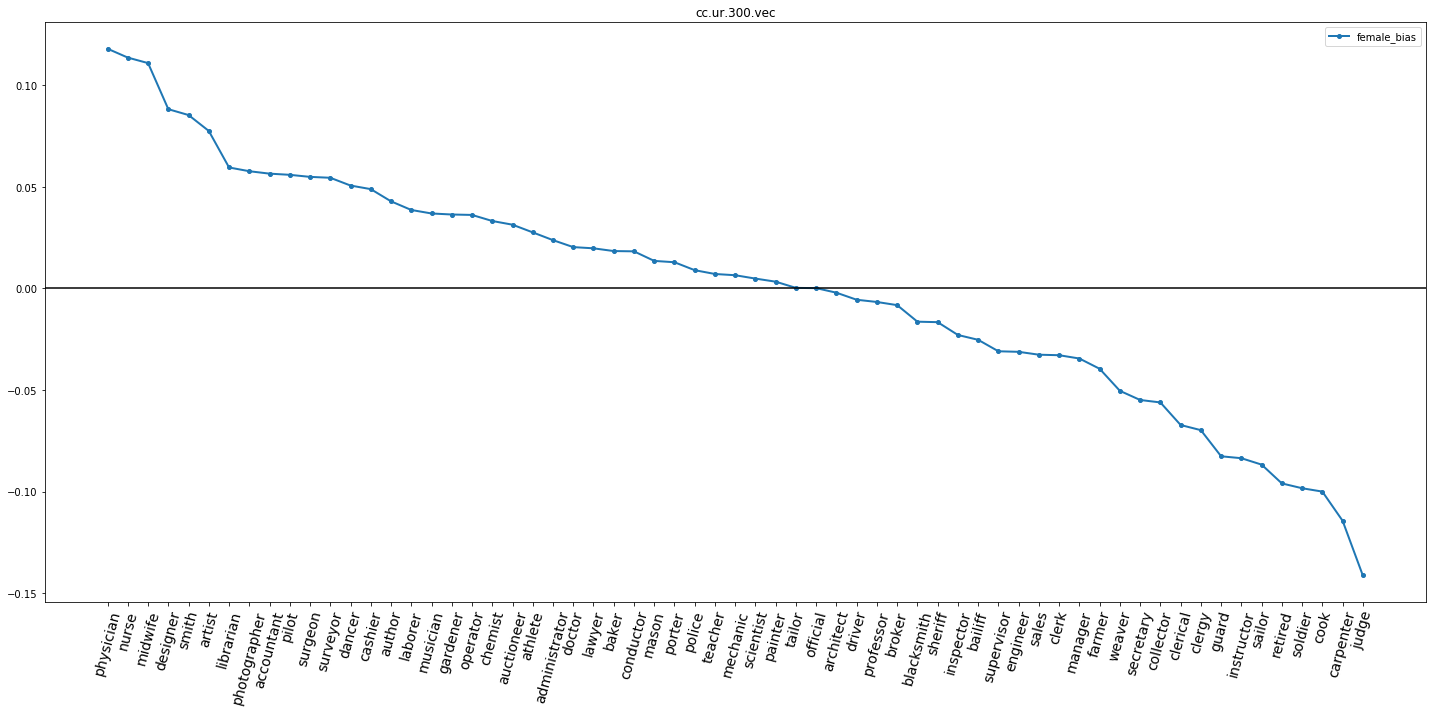

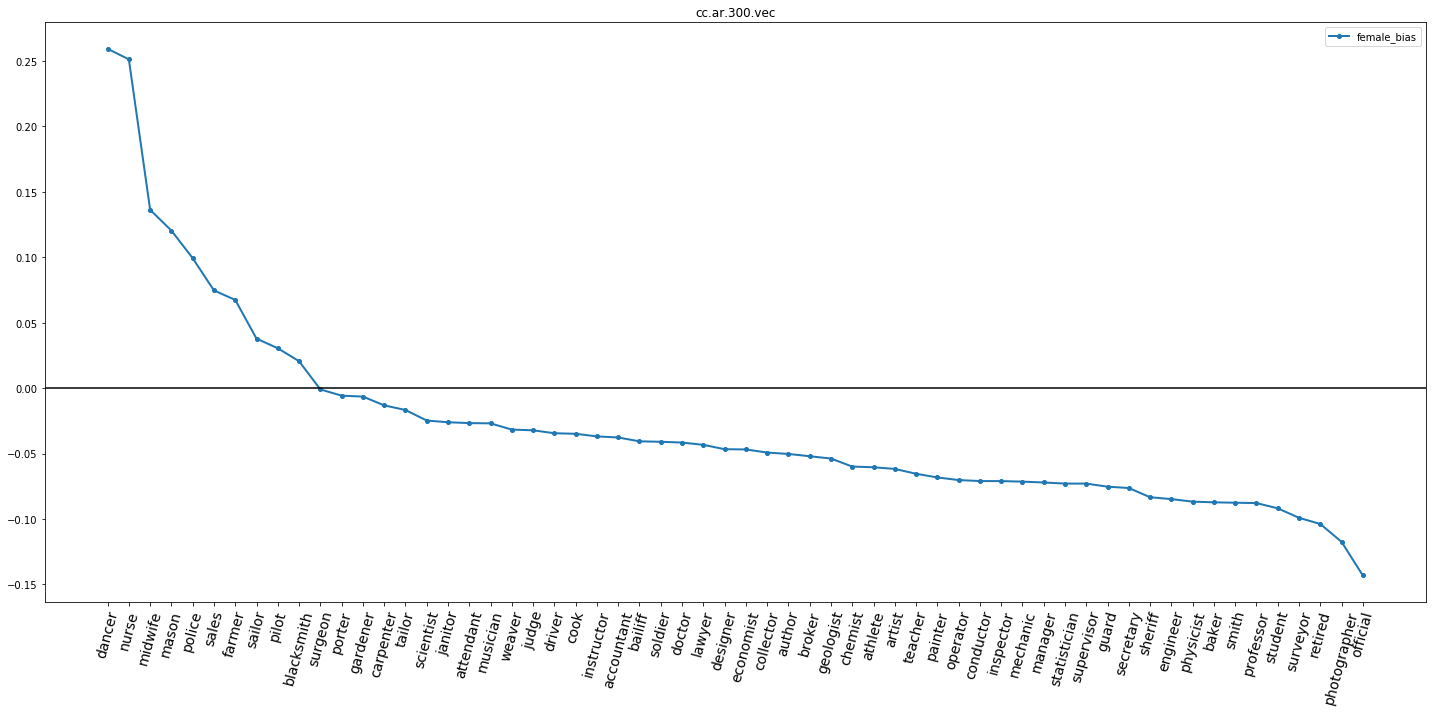

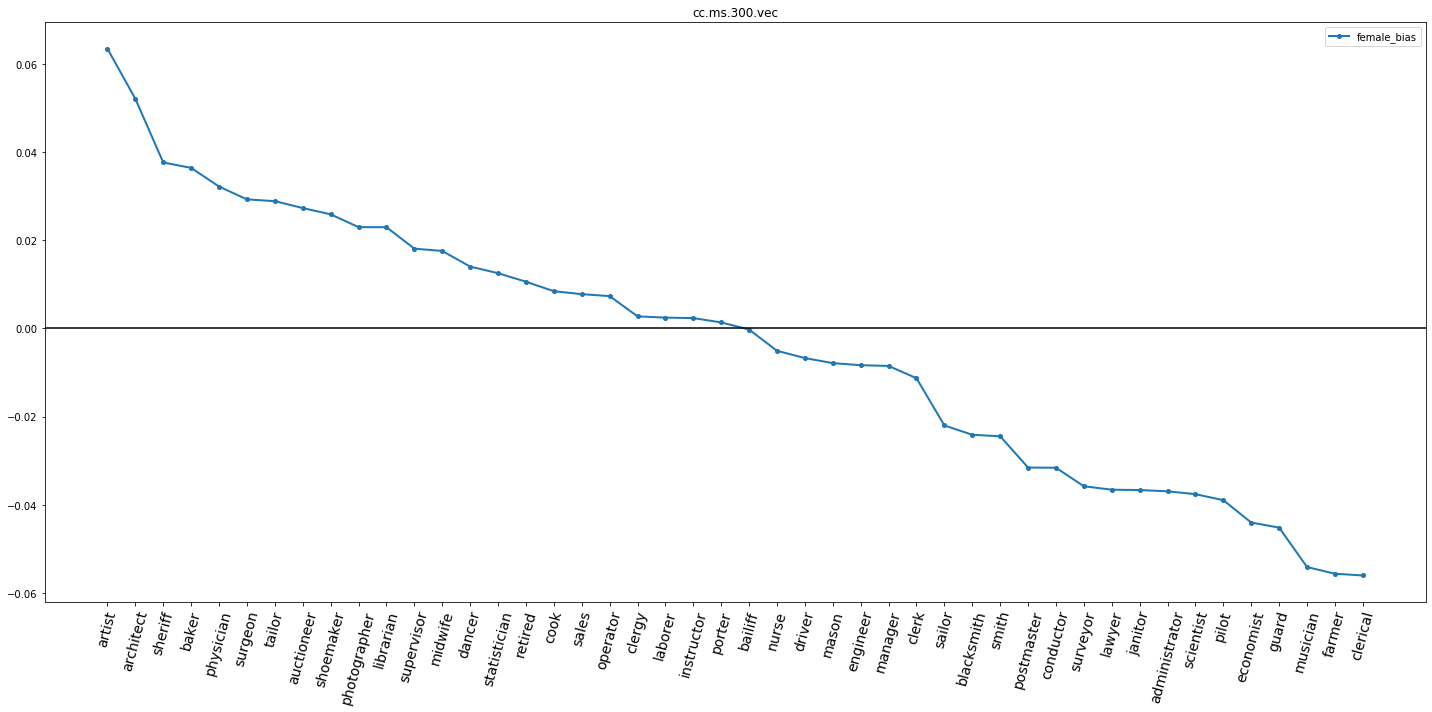

In [4]:
from plot_utils import get_bias_plot
female_bias_dict_for_all_embeddings = calculate_bias_for_all_embedding(association_dict=association_dict, 
                                                                     target_label = 'professional_occupation', 
                                                                     reference_labels = ['male', 'female'])

get_bias_plot(bias_dict=female_bias_dict_for_all_embeddings, b2e_dict=b2e_dict, bias_label = 'female_bias')

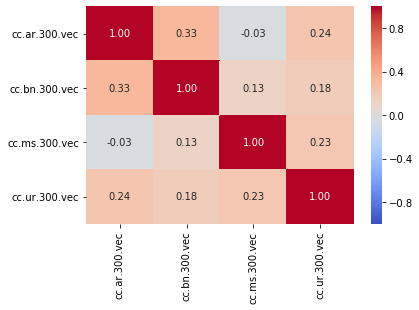

In [5]:
import pandas as pd
df = pd.DataFrame.from_dict(female_bias_dict_for_all_embeddings)
get_correlation_heatmap(df=df)